In [1]:
# !pip install psycopg2-binary 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:a@localhost:5432/sqlChallenge')
connection = engine.connect()

In [34]:
# Create a histogram to visualize the most common salary ranges for employees.
# Create a bar chart of average salary by title.
#  build query
table =engine.dialect.identifier_preparer.quote("Salaries")
query = f"SELECT * FROM public.{table}"
#  read the data
df = pd.read_sql(query, connection)
# df.head()

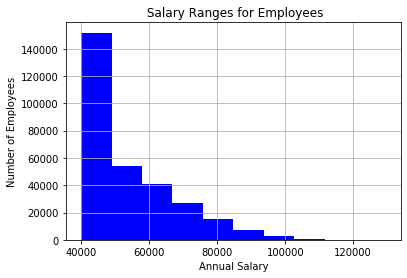

In [35]:
df["salary"].hist(color="blue")
plt.title(" Salary Ranges for Employees")
plt.xlabel("Annual Salary")
plt.ylabel("Number of Employees")
plt.savefig("images/histogram_salaries.png")
plt.show()